In this notebook, a simple model is trained for predicting the duration of a ride.

Data:

https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf

In [1]:
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install pyarrow

In [3]:
pd.__version__

'1.4.2'

In [4]:
sklearn.__version__

'1.0.2'

In [6]:
#https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page
# The data is available as 'Parquet' format.
df_jan23 = pd.read_parquet('./data/yellow_tripdata_2023-01.parquet')
df_jan23

FileNotFoundError: [Errno 2] No such file or directory: './data/yellow_tripdata_2023-01.parquet'

In [ ]:
df_jan23.info()  #Total 19 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [ ]:
df_jan23['duration'] = df_jan23['tpep_dropoff_datetime'] - df_jan23['tpep_pickup_datetime']
df_jan23['duration'] = df_jan23.duration.dt.total_seconds() / 60  # in minutes
df_jan23.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333


In [ ]:
df_jan23.duration.std() #42.594351241920904

42.594351241920904

In [ ]:
df_jan23.duration.describe(percentiles=[0.95,0.98,0.99])

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
50%      1.151667e+01
95%      3.646667e+01
98%      4.873333e+01
99%      5.725000e+01
max      1.002918e+04
Name: duration, dtype: float64

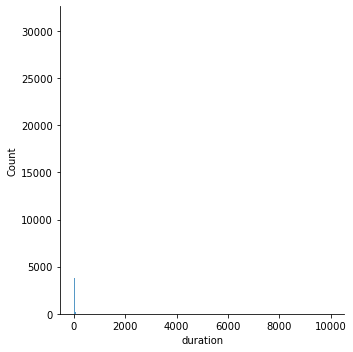

In [ ]:
sns.displot(df_jan23.duration)  #Long tail

In [ ]:
df_jan23_cnt_prev = df_jan23.shape[0]
df_jan23 = df_jan23[(df_jan23['duration']>=1) & (df_jan23['duration']<=60)]
df_jan23_cnt_new = df_jan23.shape[0]
fraction_left = df_jan23_cnt_new / df_jan23_cnt_prev
fraction_left # 0.9812202822125979

0.9812202822125979

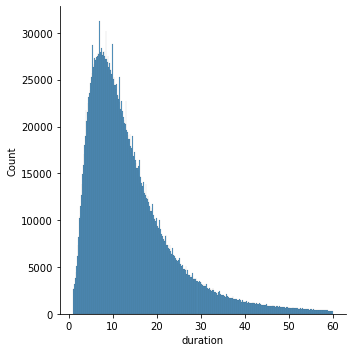

In [ ]:
sns.displot(df_jan23.duration)

In [ ]:
catagorical = ['PULocationID', 'DOLocationID']

array([2, 1])